In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Admission_Predict.csv')

In [5]:
df.shape

(400, 9)

In [6]:
df.head(6)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [10]:
df = df.drop(columns=['Serial No.'])
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [11]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [17]:
x_train_scaled

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

In [31]:
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="linear"))

/home/sai-deekshith/Documents/Machine_Learning/.venv1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102 (408.00 B)

 Trainable params: 102 (408.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='mean_squared_error',optimizer="Adam")

In [38]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0317 - val_loss: 0.0297
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0274 - val_loss: 0.0279
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0268 - val_loss: 0.0259
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0238 - val_loss: 0.0237
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0240 - val_loss: 0.0213
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0210 - val_loss: 0.0185
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 - val_loss: 0.0158
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0165 - val_loss: 0.0132
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - val_loss: 0.0111
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - val_loss: 0.0101
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0104 - val_loss: 0.0097
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - val_loss: 0.00

In [41]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_pred,y_test)

0.6393698182622216

In [44]:
import matplotlib.pyplot as plt

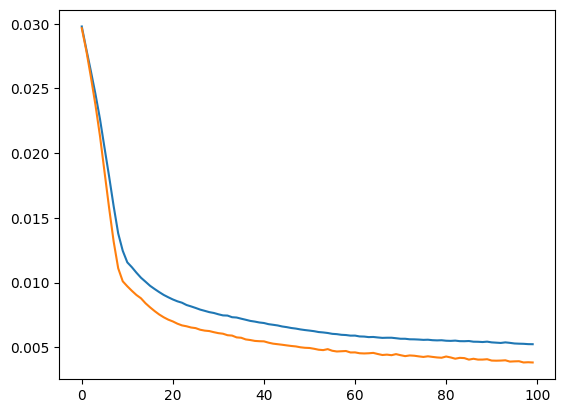

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])